# Runge Kutta Final Project - Computational Methods - ENGR 3703 - Nelson Clements

In this project we look at the spring mass damper problem as given below:

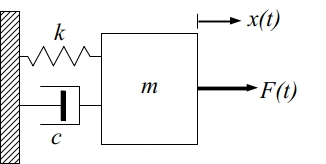


In the figure the variables and parameters have the following meaning:

- $m$ = mass (kg)
- $c$ = damping constant (kg/s) - proportional to the speed of $m$
- $k$ = spring constant (N/s/s) - proportional to the distance $m$ is from it's 
- $x(t)$ = position of $m$ as a function of time
- $F(t)$ = A force applied to $m$ as a function of time

It was previously determined that:

$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$

In this project, I will do the following:

  - Write python code that uses RK 4th order to solve the ODE above. For the first part of the project, it is assumed F(t) is zero. Later, F(t) will be utilized.
  - Test code with all three unforced cases - overdamping, critically damped, and underdamping, and demonstrate the code works over a range of time-step sizes for all cases.
  - Test code using values of F(t)/m by utilization of at least three values two of which may not be constant values of F(t) - i.e. there has to be some time variation of F. 
  - Finally test the code with $F(t)/m = Acos{\omega_f t}$

The first task will be writing the code to solve for the ordinary differential equation utilizing the 4th order Runge Kutta method: 

$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$

In [29]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#Constants
#For this we want to see critically damped at zeta = 1.

zeta = 1
a = 0
b = 1
A = .1
n = 10  #Change for number of iterations
f = 0
m = 3
k = 3
t = 0
h = (b - a) / n
omega_n = np.sqrt(k / m)


f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2: ac - omega_n**2 * w1 - 2 * zeta * omega_n * w2

#Intial Conditions
w1 = 20 #Position at time 't'.
w2 = 2 #velocity at time 't'.

k = []
#Print intial values.
print(f'Initial Values:\nTime(s):       Position(x):    Velocity(v):\n {t: .2f} \t{w1:10.2f} \t {w2:10.2f}\n')

#RK4
for i in range(0, n):
    ac = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5]))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6    
    t = a + (i + 1) * h
    print(f'{t:.4f} \t       {w1:.8f}      {w2:.8f}')
    k=[]

Initial Values:
Time(s):       Position(x):    Velocity(v):
  0.00 	     20.00 	       2.00

0.1000 	       20.08785125      -0.17191000
0.2000 	       19.97876748      -1.94860734
0.3000 	       19.70942579      -3.38573044
0.4000 	       19.31129735      -4.53190604
0.5000 	       18.81130631      -5.42957903
0.6000 	       18.23241042      -6.11574776
0.7000 	       17.59411246      -6.62261551
0.8000 	       16.91291033      -6.97816729
0.9000 	       16.20269284      -7.20668035
1.0000 	       15.47508743      -7.32917574


Now, we must solve the RK4 ODE for underdamped systems, critically damped systems, and overdamped systems.
In order to do this we will need three seperate graphs to display our findings and visualize the importance of zeta in solving this probelm.

## Here we see the method for Underdamped Systems

Initial Values:
Time(s):       Position(x):    Velocity(m/s):
0.0 	       5.00 	       0.00



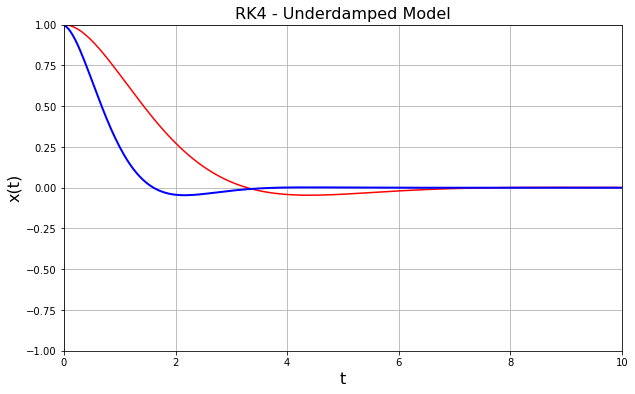

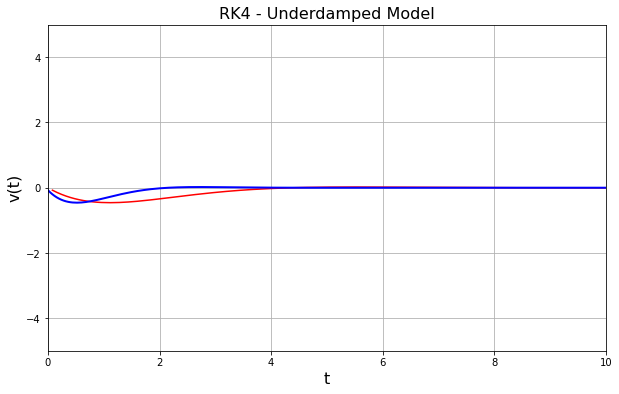

In [35]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#Give an underdamped value for zeta here
zeta = .7

f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2, zeta, omega_n, acc: acc - omega_n**2 * w1 - 2 * zeta * omega_n * w2

def xud_of_t(DI, DII, zeta, omega_n, omega_d, t):
    return np.exp(-zeta * omega_n * t) * (DI * np.cos(omega_d * t) + DII * np.sin(omega_d * t))
def vud_of_t(DI, DII, zeta, omega_n, omega_d, t):
    return np.exp(-zeta * omega_n * t) * (-DI * (omega_d * np.sin(omega_d * t) + zeta * omega_n * np.cos(omega_d * t)) + DII * (omega_d * np.cos(omega_d * t) - zeta * omega_n * np.sin(omega_d * t)))

b = 40
n = 500
a = 0
h = (b - a) / n
t = a
k = 3
m = 3
f = 3
acc = f / m
B = 0
A = 1
omega_n = np.sqrt(k / m)

u_d = 'RK4 - Underdamped Model'

#Intial Conditions
w1 = 5.0 #Position at time t
w2 = 0.0 #velocity at time t

k = []
tlist = []
w1list = []
w2list = []

print(f'Initial Values:\nTime(s):       Position(x):    Velocity(m/s):\n{t:.1f} \t {w1:10.2f} \t {w2:10.2f}\n')

#Fourth order Runga Kutta
for i in range(0, n):
    acc = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5], zeta, omega_n, acc))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6
    t = a + (i + 1) * h
    tlist.append(t)
    w1list.append(w1)
    w2list.append(w2)

    k=[]

A = 1 #x(o)
B = 0 #v(0)

omega_d = omega_n * np.sqrt(1 - zeta**2)

DI = A
DII = (B + A * zeta * omega_n) / omega_d

ti = 0
tf = 20
t1 = np.linspace(ti, tf, n)

plt.figure(figsize = (10,6))
plt.title(u_d, fontsize = 16)
x_ud = [xud_of_t(DI, DII, zeta, omega_n, omega_d, tval) for tval in tlist]
plt.plot(tlist, x_ud, color = 'r')    #what the graph is given the values
plt.plot(t1,x_ud,label="RK4 - Underdamped Model",color="b",linewidth="2.0")  #what the graph should look like    
plt.xlim(0,10)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.show()

plt.figure(figsize = (10,6))
plt.title(u_d, fontsize = 16)
v_ud = [vud_of_t(DI, DII, zeta, omega_n, omega_d, tval) for tval in tlist]
plt.plot(tlist, v_ud, color = 'r')
plt.plot(t1,v_ud,label="RK4 - Underdamped Model",color="b",linewidth="2.0")
plt.xlim(0,10)
plt.ylim(-5,5)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('v(t)', fontsize = 16)
plt.show()

In this underdamped system we can see that the velocity takes longer to stablize than normal, as well as how the position is slower to normalize as well.

## Here we see the method for Overdamped Systems

Initial Values:
Time(s):       Position(x):    Velocity(m/s):
0.0 	       1.00 	       0.00



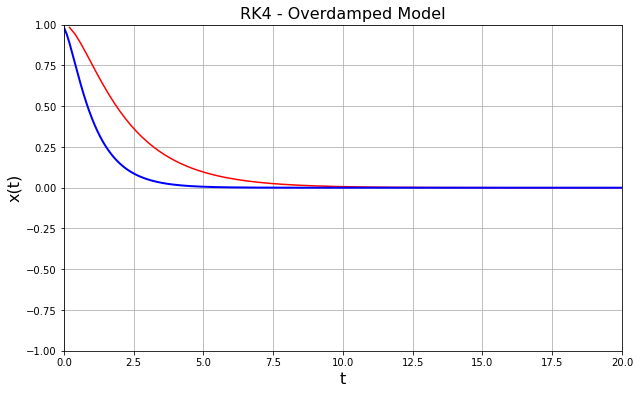

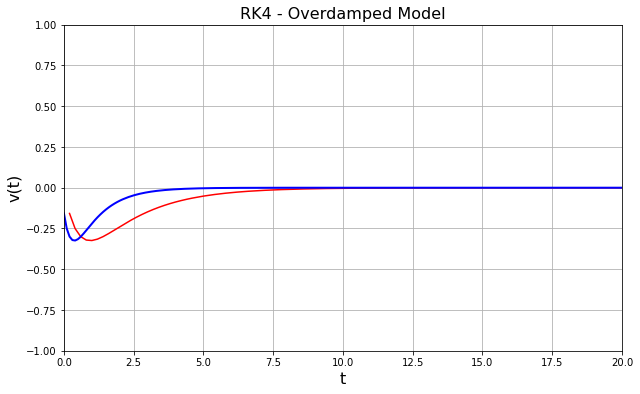

In [44]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#Give an overdamped value for zeta here
zeta = 1.2

f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2, zeta, omega_n, acc: acc - omega_n**2 * w1 - 2 * zeta * omega_n * w2

def xod_of_t(CI, CII, lI, lII, t):
    return CI * np.exp(lI * t) + CII * np.exp(lII * t)
def vod_of_t(CI, CII, lI, lII, t):
    return CI * lI * np.exp(lI * t) + CII * lII * np.exp(lII * t)

b = 40
n = 200
a = 0
h = (b - a) / n
t = a
k = 3
m = 3
q = 7
f = 3 * q
acc = f / m
B = 0
A = 1
omega_n = np.sqrt(k / m)

o_d = 'RK4 - Overdamped Model'

#Intial Conditions
w1 = 1.0 #Position at time t
w2 = 0.0 #velocity at time t

k = []
tlist = []
w1list = []
w2list = []

print(f'Initial Values:\nTime(s):       Position(x):    Velocity(m/s):\n{t:.1f} \t {w1:10.2f} \t {w2:10.2f}\n')

#Fourth order Runga Kutta
for i in range(0, n):
    acc = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5], zeta, omega_n, acc))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6
    t = a + (i + 1) * h
    tlist.append(t)
    w1list.append(w1)
    w2list.append(w2)
    k=[]

lambda_I = -omega_n * (zeta - np.sqrt(abs(pow(zeta, 2) - 1)))
lambda_II = -omega_n * (zeta + np.sqrt(abs((pow(zeta, 2) - 1))))
CI_od = (B - A * lambda_II) / (lambda_I - lambda_II)
CII_od = (A * lambda_I - B) / (lambda_I - lambda_II)
zeta_od = 0
omega_d = omega_n * sqrt(1 - zeta_od**2)

ti = 0
tf = 20
t1 = np.linspace(ti, tf, n)

plt.figure(figsize = (10,6))
plt.title(o_d, fontsize = 16)
x_od = [xod_of_t(CI_od, CII_od, lambda_I,lambda_II,tval) for tval in tlist]
plt.plot(tlist, x_od, color = 'r')
plt.plot(t1,x_od,label="RK4 - Overdamped Model",color="b",linewidth="2.0")    
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.show()

plt.figure(figsize = (10,6))
plt.title(o_d, fontsize = 16)
v_od = [vod_of_t(CI_od,CII_od,lambda_I,lambda_II,tval) for tval in tlist]
plt.plot(tlist, v_od, color = 'r')
plt.plot(t1,v_od,label="RK4 - Overdamped Model",color="b",linewidth="2.0")
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('v(t)', fontsize = 16)
plt.show()

Here we notice the system is still out of sync and takes longer to achieve a uniform speed and position.

## Here we see the method for Critically Damped Systems

Initial Values:
Time(s):       Position(x):    Velocity(m/s):
0.0 	       1.00 	       0.00



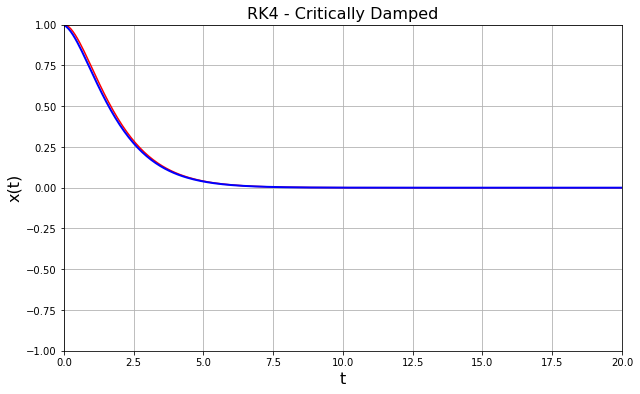

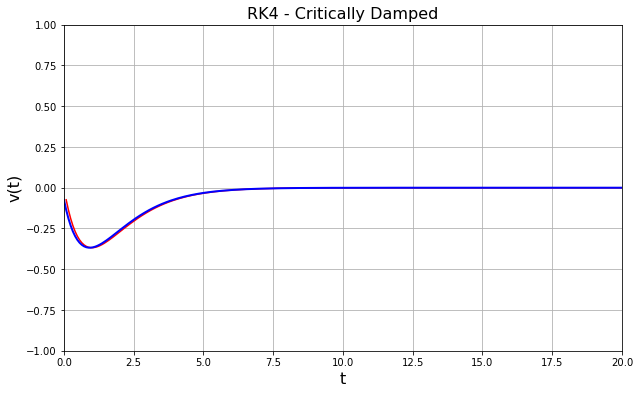

In [45]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#The critical damping value for zeta is given here
zeta = 1.0

f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2, zeta, omega_n, acc: acc - omega_n**2 * w1 - 2 * zeta * omega_n * w2

def xcd_of_t(CI, CII, omega_n, t):
    return CI*exp(-omega_n*t)+CII*t*exp(-omega_n*t)
def vcd_of_t(CI, CII, omega_n, t):
    return exp(-omega_n*t)*(-omega_n*CI+CII*(1-omega_n*t))

n = 500
a = 0
b = 40
h = (b - a) / n
t = a
k = 3
m = 3
q = 14
f = 3 * q
acc = f / m
B = 0
A = 1    
omega_n = np.sqrt(k / m)

c_d = 'RK4 - Critically Damped'

#Intial Conditions
w1 = 1.0 #Position at time 't'.
w2 = 0.0 #velocity at time 't'.

k = []
tlist = []
w1list = []
w2list = []

print(f'Initial Values:\nTime(s):       Position(x):    Velocity(m/s):\n{t:.1f} \t {w1:10.2f} \t {w2:10.2f}\n')

#Fourth order Runga Kutta
for i in range(0, n):
    acc = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5], zeta, omega_n, acc))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6
    t = a + (i + 1) * h    
    tlist.append(t)
    w1list.append(w1)
    w2list.append(w2)
    k=[]

omega_d = omega_n * np.sqrt(zeta**2)

CI_cd = A
CII_cd = B + omega_n * A

ti=0
tf=40
t1 = np.linspace(ti,tf,n)

plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
x_cd = [xcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, x_cd, color = 'r')   #what the graph is given the values
plt.plot(t1,x_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.show()
                 
plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
v_cd = [vcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, v_cd, color = 'r')  #what the graph is given the values
plt.plot(t1,v_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('v(t)', fontsize = 16)
plt.show()

This graph shows that as the position and velocity change, they rapidly and smoothly approach 0 in a controlled manner. This is the critical dampening that is useful for spring dampers in things such as vehicles.

## Here we test again with an f(t) value that is not constant

Initial Values:
Time(s):       Position(x):    Velocity(m/s):
0.0 	       1.00 	       0.00



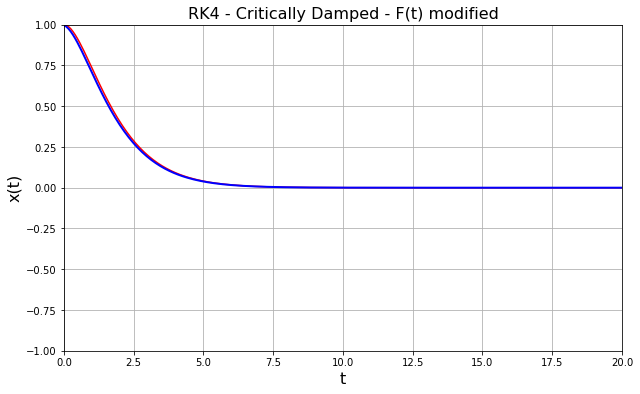

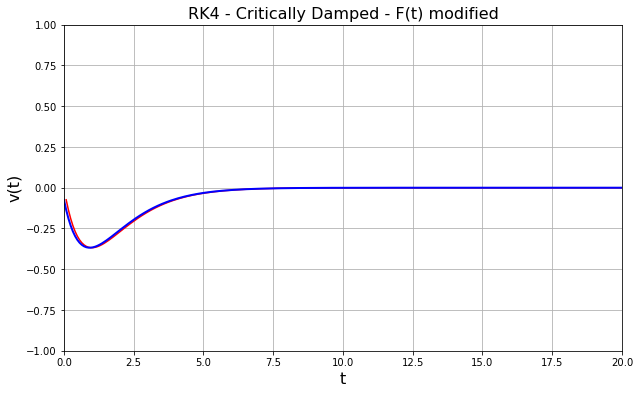

In [41]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#The critical damping value for zeta is given here
zeta = 1.0

f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2, zeta, omega_n, acc: acc - omega_n**2 * w1 - 2 * zeta * omega_n * w2

def xcd_of_t(CI, CII, omega_n, t):
    return CI*exp(-omega_n*t)+CII*t*exp(-omega_n*t)
def vcd_of_t(CI, CII, omega_n, t):
    return exp(-omega_n*t)*(-omega_n*CI+CII*(1-omega_n*t))

n = 500
a = 0
b = 40
h = (b - a) / n
t = a
k = 3
m = 3
Q = 7
F = 3 * Q
acc = F / m
B = 0
A = 1    
omega_n = np.sqrt(k / m)

c_d = 'RK4 - Critically Damped - F(t) modified'

#Intial Conditions
w1 = 1.0 #Position at time 't'.
w2 = 0.0 #velocity at time 't'.

k = []
tlist = []
w1list = []
w2list = []

print(f'Initial Values:\nTime(s):       Position(x):    Velocity(m/s):\n{t:.1f} \t {w1:10.2f} \t {w2:10.2f}\n')

#Fourth order Runga Kutta
for i in range(0, n):
    acc = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5], zeta, omega_n, acc))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6
    t = a + (i + 1) * h    
    tlist.append(t)
    w1list.append(w1)
    w2list.append(w2)
    k=[]

omega_d = omega_n * np.sqrt(zeta**2)

CI_cd = A
CII_cd = B + omega_n * A

ti=0
tf=40
t1 = np.linspace(ti,tf,n)

plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
x_cd = [xcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, x_cd, color = 'r')   #what the graph is given the values
plt.plot(t1,x_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.show()
                 
plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
v_cd = [vcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, v_cd, color = 'r')  #what the graph is given the values
plt.plot(t1,v_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('v(t)', fontsize = 16)
plt.show()

Last, we will test with a value for $F(t)/m = Acos{\omega_f t}$

Initial Values:
Time(s):       Position(x):    Velocity(m/s):
0.0 	       1.00 	       0.00



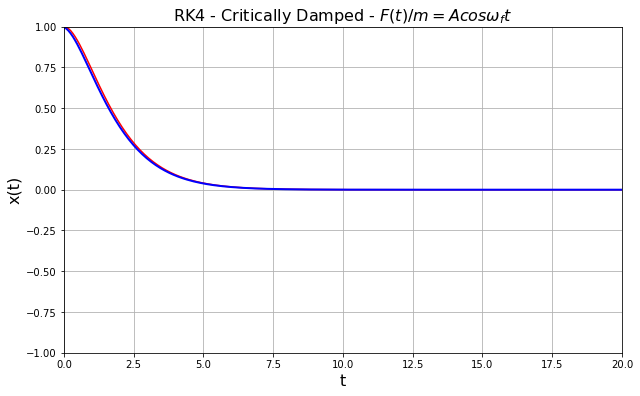

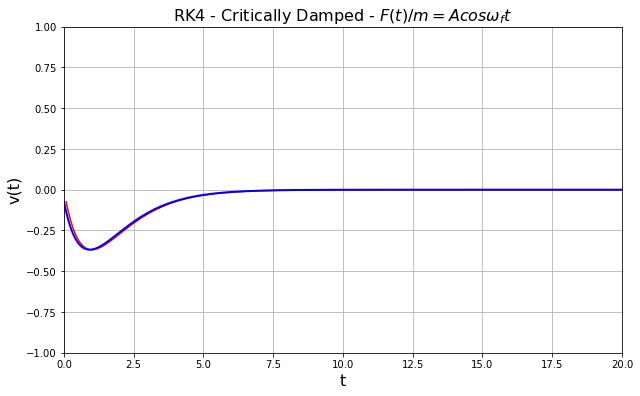

In [43]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Underdamped system when 0.0 < zeta < 1.0
#Critcally damped system when zeta = 1.0
#Overdamped system when zeta > 1.0

#The critical damping value for zeta is given here
zeta = 1.0

f1 = lambda t, w1, w2: w2
f2 = lambda t, w1, w2, zeta, omega_n, acc: acc - omega_n**2 * w1 - 2 * zeta * omega_n * w2

def xcd_of_t(CI, CII, omega_n, t):
    return CI*exp(-omega_n*t)+CII*t*exp(-omega_n*t)
def vcd_of_t(CI, CII, omega_n, t):
    return exp(-omega_n*t)*(-omega_n*CI+CII*(1-omega_n*t))

n = 500
a = 0
b = 40
h = (b - a) / n
t = a
k = 3
m = 3
f = A * cos(w1) * t
acc = f / m
B = 0
A = 1    
omega_n = np.sqrt(k / m)

c_d = 'RK4 - Critically Damped - $F(t)/m = Acos{\omega_f t}$'

#Intial Conditions
w1 = 1.0 #Position at time 't'.
w2 = 0.0 #velocity at time 't'.

k = []
tlist = []
w1list = []
w2list = []

print(f'Initial Values:\nTime(s):       Position(x):    Velocity(m/s):\n{t:.1f} \t {w1:10.2f} \t {w2:10.2f}\n')

#Fourth order Runga Kutta
for i in range(0, n):
    acc = A * np.cos(0.99 * t)
    k.append(h * f1(t, w1, w2))
    k.append(h * f2(t, w1, w2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2))
    k.append(h * f2(t + h / 2, w1 + k[0] / 2, w2 + k[1] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2))
    k.append(h * f2(t + h / 2, w1 + k[2] / 2, w2 + k[3] / 2, zeta, omega_n, acc))
    k.append(h * f1(t + h, w1 + k[4], w2 + k[5]))
    k.append(h * f2(t + h, w1 + k[4], w2 + k[5], zeta, omega_n, acc))
    w1 = w1 + (k[0] + 2 * k[2] + 2 * k[4] + k[6]) / 6
    w2 = w2 + (k[1] + 2 * k[3] + 2 * k[5] + k[7]) / 6
    t = a + (i + 1) * h    
    tlist.append(t)
    w1list.append(w1)
    w2list.append(w2)
    k=[]

omega_d = omega_n * np.sqrt(zeta**2)

CI_cd = A
CII_cd = B + omega_n * A

ti=0
tf=40
t1 = np.linspace(ti,tf,n)

plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
x_cd = [xcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, x_cd, color = 'r')   #what the graph is given the values
plt.plot(t1,x_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('x(t)', fontsize = 16)
plt.show()
                 
plt.figure(figsize = (10,6))
plt.title(c_d, fontsize = 16)
v_cd = [vcd_of_t(CI_cd, CII_cd, omega_n, tval) for tval in tlist]
plt.plot(tlist, v_cd, color = 'r')  #what the graph is given the values
plt.plot(t1,v_cd,label="RK4 - Critically Damped",color="b",linewidth="2.0")  #what the graph should look like
plt.xlim(0,20)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('t', fontsize = 16)
plt.ylabel('v(t)', fontsize = 16)
plt.show()

As we can see, utilizing the zeta value of 1 for the critical damping for each of these variations ensures that the spring mass is quickly and smoothly put in balance, while avoiding any drastic speed or position changes. 